In [1]:
from keras.utils import to_categorical, np_utils
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import (Dense, Reshape, Activation,
                          LSTM, Convolution2D, Flatten, 
                          MaxPooling1D, MaxPooling2D, Dropout, Bidirectional, BatchNormalization, GlobalAveragePooling2D)
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import pickle

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [2]:
import os

In [3]:
def convert_format(file):
    base_to_value = {65 : 49, 71 : 50 , 67 : 51 , 84 : 52}
    with open(file, 'rb') as read_file:
        seqs = pickle.load(read_file)
    seqs = list(map(lambda x: [[int(i.upper().translate(base_to_value)) for i in x[0]],
                                  [int(i.upper().translate(base_to_value)) for i in x[1]]], seqs ))
    seqs = to_categorical(seqs)
    return seqs
    

In [4]:
os.chdir('/Users/beth/Desktop/MetisProject5data/')

In [5]:
normal_bladder = convert_format("normal_bladder.pickle")
normal_breast = convert_format("normal_breast.pickle")
normal_colorectal = convert_format("normal_colorectal.pickle")
normal_glioblastoma = convert_format("normal_glioblastoma.pickle")
normal_glioma = convert_format("normal_glioma.pickle")
normal_lung = convert_format("normal_lung.pickle")
normal_pancreatic = convert_format("normal_pancreatic.pickle")
normal_prostate = convert_format("normal_prostate.pickle")
normal_renal = convert_format("normal_renal.pickle")
normal_skin = convert_format("normal_skin.pickle")
normal_stomach = convert_format("normal_stomach.pickle")
normal_uterine = convert_format("normal_uterine.pickle")
normal_liver = convert_format("normal_liver.pickle")

In [6]:
tumor_bladder = convert_format("tumor_bladder.pickle")
tumor_breast = convert_format("tumor_breast.pickle")
tumor_colorectal = convert_format("tumor_colorectal.pickle")
tumor_glioblastoma = convert_format("tumor_glioblastoma.pickle")
tumor_glioma = convert_format("tumor_glioma.pickle")
tumor_lung = convert_format("tumor_lung.pickle")
tumor_pancreatic = convert_format("tumor_pancreatic.pickle")
tumor_prostate = convert_format("tumor_prostate.pickle")
tumor_renal = convert_format("tumor_renal.pickle")
tumor_skin = convert_format("tumor_skin.pickle")
tumor_stomach = convert_format("tumor_stomach.pickle")
tumor_uterine = convert_format("tumor_uterine.pickle")
tumor_liver = convert_format("tumor_liver.pickle")

In [7]:
normal_glio = np.concatenate([normal_glioma,normal_glioblastoma],axis=0)
tumor_glio = np.concatenate([tumor_glioma,tumor_glioblastoma],axis=0)

In [8]:
del normal_glioma,normal_glioblastoma,tumor_glioma,tumor_glioblastoma

In [9]:
np.random.seed(11)

In [10]:
def train_test_split(array):
    indices=np.random.randint(array.shape[0], size=2000)
    test = array[indices]
    train = array[[i for i in range(array.shape[0]) if not i in indices]]
    return test, train

In [11]:
bladder_test, bladder_train = train_test_split(tumor_bladder)
del tumor_bladder
breast_test, breast_train = train_test_split(tumor_breast)
del tumor_breast
colorectal_test, colorectal_train = train_test_split(tumor_colorectal)
del tumor_colorectal

In [12]:
glio_test, glio_train = train_test_split(tumor_glio)
del tumor_glio
lung_test, lung_train = train_test_split(tumor_lung)
del tumor_lung
pancreatic_test, pancreatic_train = train_test_split(tumor_pancreatic)
del tumor_pancreatic

In [13]:
renal_test, renal_train = train_test_split(tumor_renal)
del tumor_renal
prostate_test, prostate_train = train_test_split(tumor_prostate)
del tumor_prostate
skin_test, skin_train = train_test_split(tumor_skin)
del tumor_skin
stomach_test, stomach_train = train_test_split(tumor_stomach)
del tumor_stomach
uterine_test, uterine_train = train_test_split(tumor_uterine)
del tumor_uterine
liver_test, liver_train = train_test_split(tumor_liver)
del tumor_liver

In [14]:
bladder_test_normal, bladder_train_normal = train_test_split(normal_bladder)
del normal_bladder
breast_test_normal, breast_train_normal = train_test_split(normal_breast)
del normal_breast
colorectal_test_normal, colorectal_train_normal = train_test_split(normal_colorectal)
del normal_colorectal
glio_test_normal, glio_train_normal = train_test_split(normal_glio)
del normal_glio
lung_test_normal, lung_train_normal = train_test_split(normal_lung)
del normal_lung
pancreatic_test_normal, pancreatic_train_normal = train_test_split(normal_pancreatic)
del normal_pancreatic
renal_test_normal, renal_train_normal = train_test_split(normal_renal)
del normal_renal
prostate_test_normal, prostate_train_normal = train_test_split(normal_prostate)
del normal_prostate
skin_test_normal, skin_train_normal = train_test_split(normal_skin)
del normal_skin
stomach_test_normal, stomach_train_normal = train_test_split(normal_stomach)
del normal_stomach
uterine_test_normal, uterine_train_normal = train_test_split(normal_uterine)
del normal_uterine
liver_test_normal, liver_train_normal = train_test_split(normal_liver)
del normal_liver

In [15]:
y_train_tumor = [1]*bladder_train.shape[0]+[2]*breast_train.shape[0]+[3]*colorectal_train.shape[0]+[4]*glio_train.shape[0]+[5]*lung_train.shape[0]\
+[6]*pancreatic_train.shape[0]+[7]*renal_train.shape[0]+[8]*prostate_train.shape[0]+[9]*skin_train.shape[0]+[10]*stomach_train.shape[0]\
+[11]*uterine_train.shape[0]+[12]*liver_train.shape[0]

In [16]:
len(y_train_tumor)

2231490

In [17]:
tumor = np.concatenate([bladder_train,breast_train,colorectal_train],axis=0)

In [18]:
tumor = np.concatenate([tumor,glio_train],axis=0)

In [19]:
del bladder_train, breast_train, colorectal_train, glio_train

In [20]:
tumor = np.concatenate([tumor,lung_train,pancreatic_train,renal_train],axis=0)

In [21]:
del lung_train, pancreatic_train, renal_train

In [22]:
tumor = np.concatenate([tumor,prostate_train,skin_train,stomach_train],axis=0)

In [23]:
del prostate_train,skin_train,stomach_train

In [24]:
tumor = np.concatenate([tumor,uterine_train],axis=0)

In [25]:
del uterine_train

In [26]:
tumor = np.concatenate([tumor,liver_train],axis=0)
del liver_train

In [27]:
tumor.shape

(2231490, 2, 100, 5)

In [28]:
from collections import defaultdict

In [29]:
class_weights = defaultdict(int)
for i in range(1,13):
    class_weights[i]=y_train_tumor.count(i)

In [30]:
class_weights

defaultdict(int,
            {1: 107145,
             2: 114558,
             3: 207706,
             4: 116236,
             5: 196181,
             6: 27982,
             7: 24693,
             8: 27325,
             9: 324160,
             10: 150133,
             11: 883308,
             12: 52063})

In [45]:
y_train_normal = [0]*(bladder_train_normal.shape[0]+breast_train_normal.shape[0]+colorectal_train_normal.shape[0]+glio_train_normal.shape[0]+lung_train_normal.shape[0]\
+pancreatic_train_normal.shape[0]+renal_train_normal.shape[0]+prostate_train_normal.shape[0]+skin_train_normal.shape[0]+stomach_train_normal.shape[0]+uterine_train_normal.shape[0]+liver_train_normal.shape[0])


NameError: name 'bladder_train_normal' is not defined

In [46]:
len(y_train_normal)

2232877

In [35]:
normal = np.concatenate([bladder_train_normal,breast_train_normal,colorectal_train_normal],axis=0)

In [36]:
normal = np.concatenate([normal,glio_train_normal],axis=0)

In [37]:
del bladder_train_normal, breast_train_normal, colorectal_train_normal, glio_train_normal

In [38]:
normal = np.concatenate([normal,lung_train_normal,pancreatic_train_normal,renal_train_normal],axis=0)

In [39]:
del lung_train_normal, pancreatic_train_normal, renal_train_normal

In [40]:
normal = np.concatenate([normal,prostate_train_normal,skin_train_normal,stomach_train_normal],axis=0)

In [41]:
del prostate_train_normal,skin_train_normal,stomach_train_normal

In [42]:
normal = np.concatenate([normal,uterine_train_normal, liver_train_normal],axis=0)
del uterine_train_normal, liver_train_normal

In [43]:
normal.shape[0]

2232877

In [47]:
class_weights[0]=normal.shape[0]

In [48]:
class_weights

defaultdict(int,
            {1: 107145,
             2: 114558,
             3: 207706,
             4: 116236,
             5: 196181,
             6: 27982,
             7: 24693,
             8: 27325,
             9: 324160,
             10: 150133,
             11: 883308,
             12: 52063,
             0: 2232877})

In [49]:
for key in class_weights.keys():
    class_weights[key]=class_weights[0]/class_weights[key]

In [50]:
class_weights

defaultdict(int,
            {1: 20.839768537962573,
             2: 19.491235880514672,
             3: 10.750180543653048,
             4: 19.209857531229567,
             5: 11.381718922831467,
             6: 79.79690515331285,
             7: 90.42550520390394,
             8: 81.71553522415371,
             9: 6.888194101678184,
             10: 14.872659575176677,
             11: 2.5278577800721833,
             12: 42.887981868121315,
             0: 1.0})

In [51]:
y_train = y_train_tumor + y_train_normal

In [52]:
len(y_train)

4464367

In [53]:
X_train = np.concatenate([tumor,normal],axis=0)
del tumor,normal

In [54]:
X_train.shape

(4464367, 2, 100, 5)

In [55]:
y_train = to_categorical(y_train)

In [56]:
del train_test_split
from sklearn.model_selection import train_test_split

In [57]:
X_train.shape

(4464367, 2, 100, 5)

In [58]:
y_train.shape

(4464367, 13)

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=11, stratify=y_train)

In [60]:
model=Sequential()

model.add(Convolution2D(input_shape=(2,100,5),
                       filters=64,
                       kernel_size=(2,3),
                       padding="same",
                       activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=2,
                       padding="same"))

model.add(Convolution2D(filters=33,
                       kernel_size=(2,2),
                       padding="same",
                       activation="relu"))
model.add(MaxPooling2D(pool_size=2,
                       padding="same"))
model.add(BatchNormalization(axis=-1))

model.add(GlobalAveragePooling2D())

model.add(Dense(units=13))
model.add(Activation('softmax'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 100, 64)        1984      
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 100, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 50, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 50, 33)         8481      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 25, 33)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1, 25, 33)         132       
_________________________________________________________________
global_average_pooling2d_1 ( (None, 33)               

In [62]:
callback = EarlyStopping(monitor='val_loss', patience=4)

In [66]:
optimizer = Adam(lr=0.1)

In [67]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_crossentropy','accuracy'])

In [68]:
model.fit(X_train, y_train, epochs=100, batch_size=10000,
              validation_data=(X_val, y_val),verbose=True, callbacks=[callback], class_weight=class_weights)

Train on 4017930 samples, validate on 446437 samples
Epoch 1/100
4017930/4017930 [==============================] - 1419s 353us/step - loss: 16.0676 - categorical_crossentropy: 2.3296 - accuracy: 0.3783 - val_loss: 2.1345 - val_categorical_crossentropy: 2.1345 - val_accuracy: 0.4975
Epoch 2/100
4017930/4017930 [==============================] - 1314s 327us/step - loss: 15.0229 - categorical_crossentropy: 1.9377 - accuracy: 0.5295 - val_loss: 1.5833 - val_categorical_crossentropy: 1.5833 - val_accuracy: 0.5461
Epoch 3/100
4017930/4017930 [==============================] - 1266s 315us/step - loss: 14.7121 - categorical_crossentropy: 1.8089 - accuracy: 0.5240 - val_loss: 2.3026 - val_categorical_crossentropy: 2.3026 - val_accuracy: 0.4837
Epoch 4/100
4017930/4017930 [==============================] - 1306s 325us/step - loss: 14.5941 - categorical_crossentropy: 1.7521 - accuracy: 0.5204 - val_loss: 1.6340 - val_categorical_crossentropy: 1.6340 - val_accuracy: 0.5313
Epoch 5/100
4017930/401

In [69]:
model_json = model.to_json()
with open("model_with_liver.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_with_liver.h5")

In [70]:
predictions = model.predict(X_val)

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
predictions_01 = np.argmax(predictions,axis=1) #predvec from below

In [73]:
pd.Series(predictions_01).value_counts()

0     188468
9      52843
7      41757
11     38027
5      29124
8      26480
6      17330
4      12418
10     11911
1      10831
12     10399
2       5999
3        850
dtype: int64

In [74]:
pd.Series(np.argmax(y_val,axis=1)).value_counts()

0     223288
11     88331
9      32416
3      20771
5      19618
10     15013
4      11624
2      11456
1      10715
12      5206
6       2798
8       2732
7       2469
dtype: int64

In [75]:
y_val_01= np.argmax(y_val,axis=1)

In [76]:
confusion = confusion_matrix(y_val_01,predictions_01)

In [77]:
import seaborn as sns

In [78]:
confusion_sum=confusion.sum(axis=1)

In [79]:
confusion_sum

array([223288,  10715,  11456,  20771,  11624,  19618,   2798,   2469,
         2732,  32416,  15013,  88331,   5206])

In [99]:
confusion2=[]
for i in range(0,13):
    confusion2.append(confusion[i]/confusion_sum[i])

In [100]:
confusion2

[array([7.95886926e-01, 6.50729103e-03, 4.43373580e-03, 3.98588370e-04,
        1.19666081e-02, 2.05474544e-02, 1.13261796e-02, 5.07819498e-02,
        2.74578123e-02, 3.20841245e-02, 8.97047759e-03, 1.68974598e-02,
        1.27413923e-02]),
 array([0.04638357, 0.26010266, 0.07447503, 0.00093327, 0.02491834,
        0.1029398 , 0.02911806, 0.1125525 , 0.03938404, 0.19934671,
        0.01717219, 0.06140924, 0.03126458]),
 array([0.03605098, 0.14568785, 0.05857193, 0.00165852, 0.03578911,
        0.11496159, 0.04085196, 0.16803422, 0.06808659, 0.17589036,
        0.02950419, 0.09523394, 0.02967877]),
 array([0.05565452, 0.0145395 , 0.01410621, 0.0064513 , 0.05228444,
        0.09022194, 0.07799336, 0.14929469, 0.14322854, 0.10957585,
        0.08767031, 0.16556738, 0.03341197]),
 array([0.04748796, 0.02245354, 0.01746387, 0.00206469, 0.06374742,
        0.10770819, 0.07467309, 0.17988644, 0.13618376, 0.14341019,
        0.03226084, 0.13282863, 0.03983138]),
 array([0.03981038, 0.06626567

In [82]:
confusion[0][0]/sum(confusion[0])

0.7958869263014582

In [83]:
confusion[1][1]/sum(confusion[1])

0.2601026598226785

In [84]:
confusion[2][2]/sum(confusion[2])

0.058571927374301676

In [85]:
confusion[3][3]/sum(confusion[3])

0.006451302296471041

In [86]:
confusion[4][4]/sum(confusion[4])

0.06374741913282864

In [87]:
confusion[5][5]/sum(confusion[5])

0.34555000509735956

In [88]:
confusion[6][6]/sum(confusion[6])

0.1461758398856326

In [89]:
confusion[7][7]/sum(confusion[7])

0.32118266504657755

In [90]:
confusion[8][8]/sum(confusion[8])

0.18521229868228403

In [91]:
confusion[9][9]/sum(confusion[9])

0.6448358835143139

In [92]:
confusion[10][10]/sum(confusion[10])

0.10657430227136482

In [93]:
confusion[11][11]/sum(confusion[11])

0.24913110912363723

In [94]:
confusion[12][12]/sum(confusion[12])

0.11294660007683442

In [151]:
import matplotlib.pyplot as plt

In [ ]:
y_train_tumor = [1]*bladder_train.shape[0]+[2]*breast_train.shape[0]+[3]*colorectal_train.shape[0]+[4]*glio_train.shape[0]+[5]*lung_train.shape[0]\
+[6]*pancreatic_train.shape[0]+[7]*renal_train.shape[0]+[8]*prostate_train.shape[0]+[9]*skin_train.shape[0]+[10]*stomach_train.shape[0]\
+[11]*uterine_train.shape[0]

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

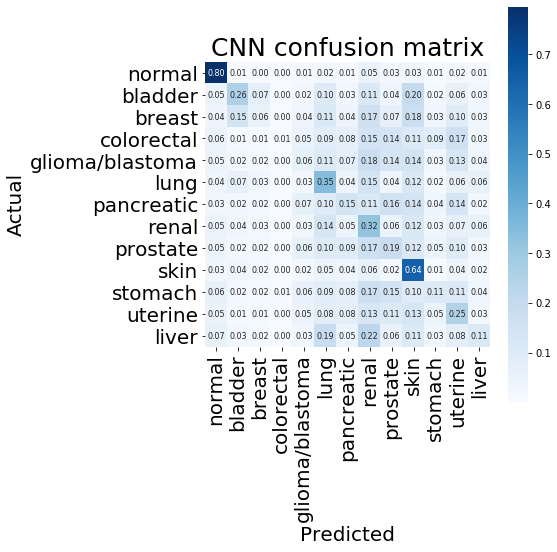

In [103]:
plt.figure(figsize=(8,8))

sns.heatmap(confusion2,square=True,cmap="Blues",annot=True,annot_kws={'size':8},xticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],
           yticklabels=['normal','bladder','breast','colorectal',\
                                               'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver'],fmt='.2f')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('CNN confusion matrix', fontsize=25)
plt.tight_layout()
#plt.savefig('model_liver.jpg');

In [ ]:
def print_stats(confusion_matrix):
    for i, v in emumerate(['normal','bladder','breast','colorectal',\
                        'glioma/blastoma','lung','pancreatic','renal','prostate','skin','stomach','uterine','liver']):
        confusion_2[i]